# 1.1 Extract Information From Your Own Transaction

In [1]:
import requests
import json
from datetime import datetime, timezone

block_height = 878997
url = f"https://api.whatsonchain.com/v1/bsv/main/block/height/{block_height}"

response = requests.get(url)


if response.status_code == 200:
    # Convert to JSON data
    block_data = response.json()
    
    
    # Extract Fields
    txcount = block_data.get("txcount", "N/A") 
    time = block_data.get("time", "N/A")  
    totalFees = block_data.get("totalFees", "N/A")  
    confirmations = block_data.get("confirmations", "N/A")  
    miner = block_data.get("miner", "N/A") 
    
    # Converting Unix timestamps to human-readable format
    time = datetime.fromtimestamp(time, tz=timezone.utc).strftime('%Y-%m-%d %H:%M:%S')

    # print
    print(f"txcount: {txcount}")
    print(f"time: {time}")
    print(f"totalFees: {totalFees}")
    print(f"confirmations: {confirmations}")
    print(f"miner: {miner}")


txcount: 241397
time: 2025-01-10 15:08:58
totalFees: 0.004551639999999857
confirmations: 320
miner: CUVVE


# 2.1 Obtain Time Series Data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


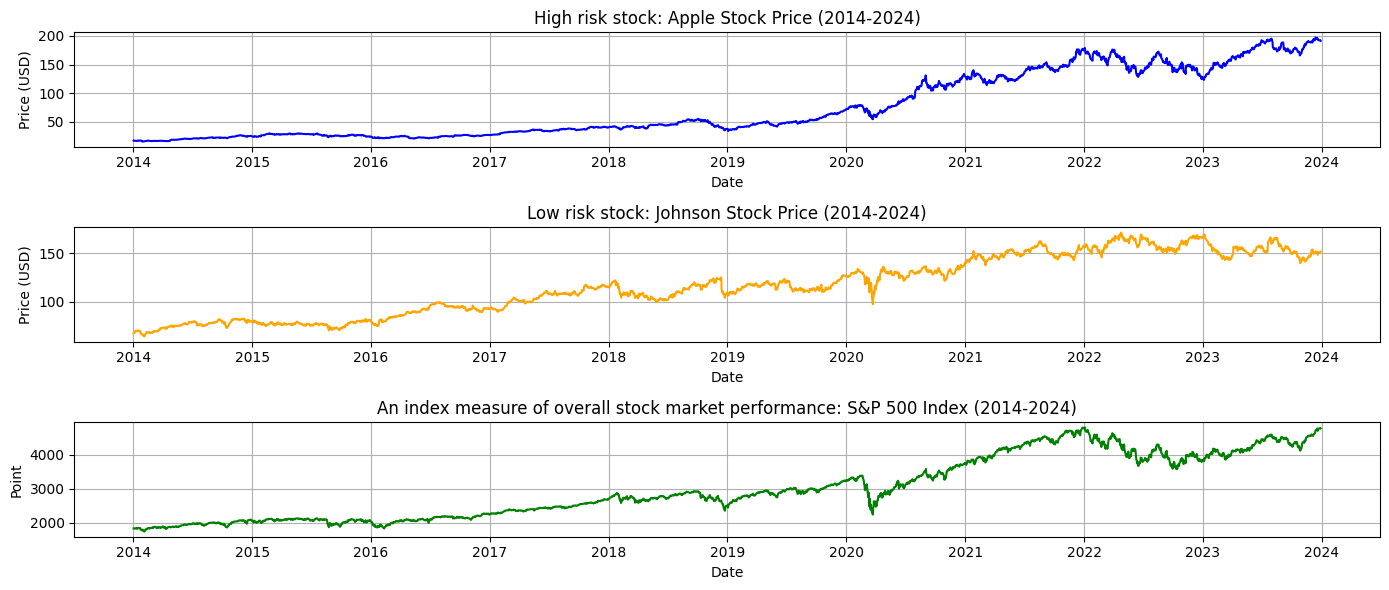

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import cryptocompare
import pandas as pd
import numpy as np

# gain data 
apple_data = yf.download("AAPL", start="2014-01-01", end="2024-01-01")
johnson_data = yf.download("JNJ", start="2014-01-01", end="2024-01-01")
sp500_data = yf.download("^GSPC", start="2014-01-01", end="2024-01-01")

# Charting Apple's Stock Price
plt.figure(figsize=(14, 6))
plt.subplot(3, 1, 1)
plt.plot(apple_data['Close'], label='Apple Stock Price', color='blue')
plt.title('High risk stock: Apple Stock Price (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Charting Disney Stock Price
plt.subplot(3, 1, 2)
plt.plot(johnson_data['Close'], label='Johnson Stock Price', color='orange')
plt.title('Low risk stock: Johnson Stock Price (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Charting the S&P 500 Index
plt.subplot(3, 1, 3)
plt.plot(sp500_data['Close'], label='S&P 500 Index', color='green')
plt.title('An index measure of overall stock market performance: S&P 500 Index (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Point')
plt.grid(True)

# Restructuring of the layout
plt.tight_layout()
plt.show()



# 2.2 Data Transformations

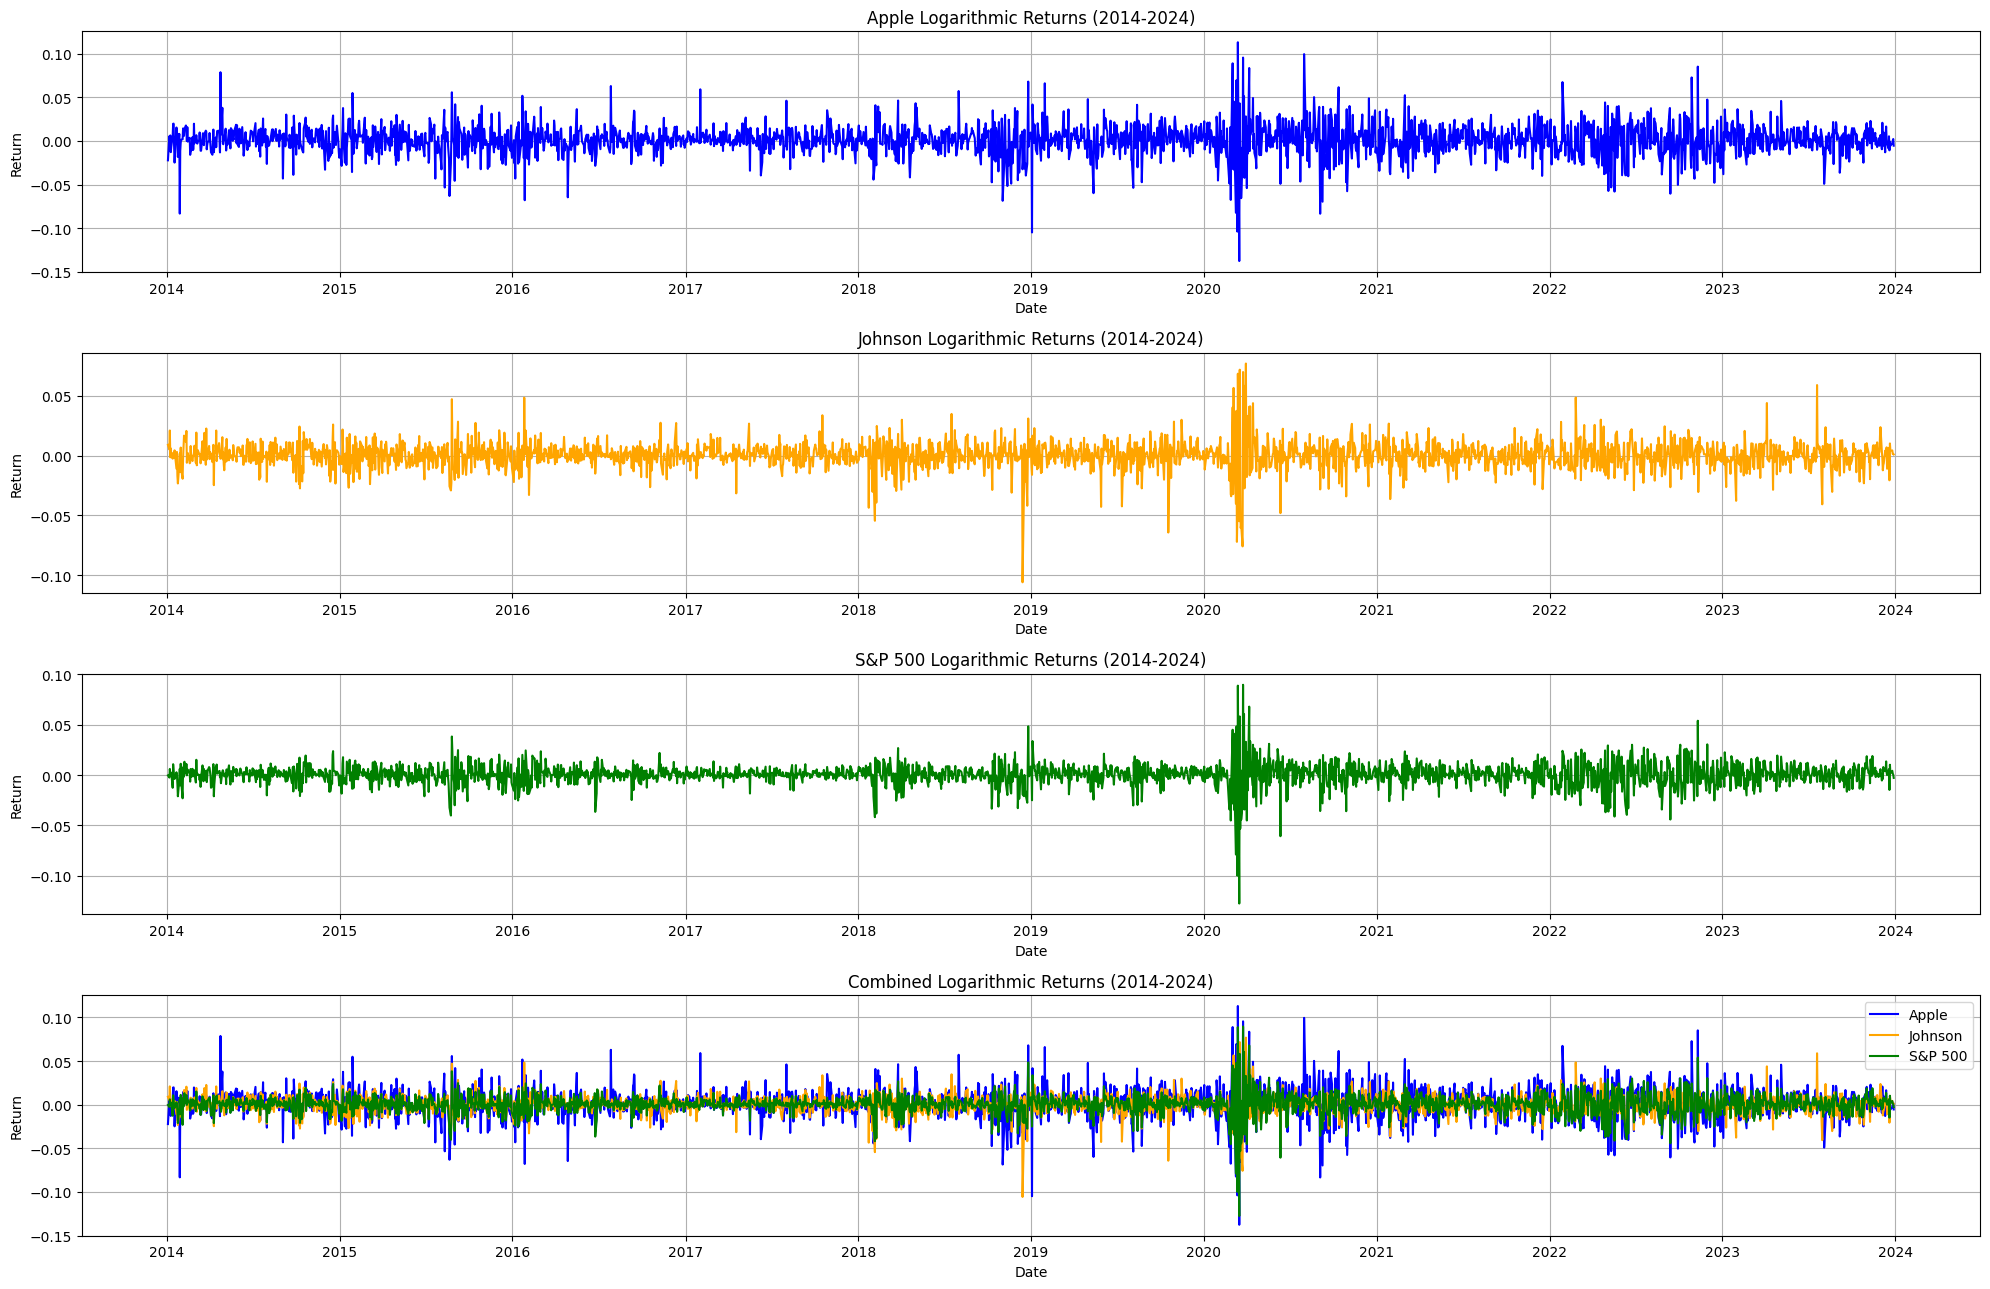

In [3]:
# Merge data into a DataFrame, ensuring consistent time indexing
data = pd.concat([apple_data['Close'], johnson_data['Close'], sp500_data['Close']], axis=1)
data.columns = ['Apple', 'Johnson', 'S&P 500']

returns = np.log(data / data.shift(1))
plt.figure(figsize=(20, 13))

# Apple logarithmic yield plot
plt.subplot(4, 1, 1)
plt.plot(returns['Apple'], label='Apple Logarithmic Returns', color='blue')
plt.title('Apple Logarithmic Returns (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Return')
plt.grid(True)

# Johnson logarithmic yield plot
plt.subplot(4, 1, 2)
plt.plot(returns['Johnson'], label='Johnson Logarithmic Returns', color='orange')
plt.title('Johnson Logarithmic Returns (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Return')
plt.grid(True)

# S&P 500 logarithmic yield plot
plt.subplot(4, 1, 3)
plt.plot(returns['S&P 500'], label='S&P 500 Logarithmic Returns', color='green')
plt.title('S&P 500 Logarithmic Returns (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Return')
plt.grid(True)

# Combined plot for all data
plt.subplot(4, 1, 4)
plt.plot(returns['Apple'], label='Apple', color='blue')
plt.plot(returns['Johnson'], label='Johnson', color='orange')
plt.plot(returns['S&P 500'], label='S&P 500', color='green')
plt.title('Combined Logarithmic Returns (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)

# Restructuring of the layout
plt.tight_layout()
plt.show()

# 2.3 Data Analysis

In [22]:
from statsmodels.api import OLS, add_constant

# Assuming apple_data, disney_data, and sp500_data are already defined
# rbt − rf t = αb + βb(rmt − rf t) + ubt

# Calculation of logarithmic rate of return
apple_data['Log_Returns'] = np.log(apple_data['Close']['AAPL'] / apple_data['Close']['AAPL'].shift(1))
johnson_data['Log_Returns'] = np.log(johnson_data['Close']['JNJ'] / johnson_data['Close']['JNJ'].shift(1))
sp500_data['Log_Returns'] = np.log(sp500_data['Close']['^GSPC'] / sp500_data['Close']['^GSPC'].shift(1))


# Consolidation of data
returns_data = pd.DataFrame({
    'apple_Returns': apple_data['Log_Returns'],
    'johnson_Returns': johnson_data['Log_Returns'],
    'SP500_Returns': sp500_data['Log_Returns']
   
}).dropna()


# Calculating relevance
correlation_matrix = returns_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# CAPM regression analysis
market_returns = returns_data['SP500_Returns']


# High-risk assets (apple)
X_apple = add_constant(market_returns)
y_apple = returns_data['apple_Returns']
model_apple = OLS(y_apple, X_apple).fit()
print("High-risk Asset (apple) CAPM Regression Results:")
print(model_apple.summary())

# Security assets (johnson)
X_johnson = add_constant(market_returns)
y_johnson = returns_data['johnson_Returns']
model_johnson = OLS(y_johnson, X_johnson).fit()
print("Johnson & Johnson Asset CAPM Regression Results:")
print(model_johnson.summary())

Correlation Matrix:
                 apple_Returns  johnson_Returns  SP500_Returns
apple_Returns         1.000000         0.367487       0.744541
johnson_Returns       0.367487         1.000000       0.574079
SP500_Returns         0.744541         0.574079       1.000000
High-risk Asset (apple) CAPM Regression Results:
                            OLS Regression Results                            
Dep. Variable:          apple_Returns   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     3126.
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:30:21   Log-Likelihood:                 7568.0
No. Observations:                2515   AIC:                        -1.513e+04
Df Residuals:                    2513   BIC:                        -1.512e+04
Df Model:                           1          

​Apple's CAPM regression formula
$$ r_{apple,t} - r_{f,t} = 0.0005 + 1.1876 \times (r_{SP500,t} - r_{f,t}) + \epsilon_{apple,t} $$
$α = 0.0005$: A value of 0.0005 for α indicates that the excess of Apple's return over the market's return is small and that this excess return is not significant  
$β_i=1.1876$：Apple's beta coefficient is 1.1876, which indicates that there is a positive correlation between Apple and the market (S&P 500) returns, and the beta coefficient is greater than 1. Apple's volatility is greater than that of the market as a whole, so Apple's stock is riskier than the market.  
R-squared= 0.554:The regression model has a good fit, implying that market returns explain about 55.4% of the volatility in Apple returns. Although the R-squared does not reach a very high level, it still indicates that Apple's returns are highly influenced by market returns.

Johnson's CAPM regression formula
$$ r_{johnson,t} - r_{f,t} = 0.0001 + 0.5815 \times (r_{SP500,t} - r_{f,t}) + \epsilon_{johnson,t} $$  
$α = 0.0001$: A value of 0.0001 for α indicates that the excess of Johnson & Johnson's return over the market's return is small and that this excess return is not significant  
$β_i=0.5815$：The beta coefficient of Johnson & Johnson is 0.5815 which shows that there is a positive correlation between the returns of Johnson & Johnson and the market (S&P 500) and the beta coefficient is less than 1,Johnson & Johnson is less volatile than the market so Johnson & Johnson stock is less risky than the market.  
R-squared = 0.330: The model has a low fit, suggesting that market returns do not fully explain the volatility of Johnson & Johnson's returns, and that Johnson & Johnson's returns may be affected by other factors (e.g., firm-specific risks or industry factors).

# 3.1 High Level Description of FinTech Firm 

### Four Structural Parts
##### 1 Streamlit UI where customers fill their application:
What it does: The UI, built using Streamlit, provides an accessible and intuitive front-end for users to submit loan applications and interact with the system.
Interaction: It collects user inputs, such as financial details and loan requirements, and sends them to the backend for processing.
Goal: To simplify the user experience and ensure seamless communication with the backend system.
##### 2 Statistical Model (Regression) running on FastAPI:
What it does: Powered by FastAPI, this module processes user data and calculates credit scores using a Logistic Regression model.
Interaction: Receives data from the UI, runs the model to assess creditworthiness, and returns the results.
Goal: To make real-time, accurate predictions about a user's likelihood of repaying a loan.
##### 3 Postgres Database that stores requests and responses:
What it does: Serves as a centralized storage for loan application data, user details, and model predictions.
Interaction: Stores data received from the UI and backend API, ensuring it is securely accessible for analysis and future reference.
Goal: To maintain a reliable and structured repository of information for audits, compliance, and system optimization.
##### 4 JupyterLab to analyse the data:
What it does: Facilitates data analysis and model optimization by providing an interactive environment for exploring data trends and improving the system’s performance.
Interaction: Accesses the database to retrieve historical data, evaluates model performance, and suggests improvements.
Goal: To refine the credit risk model and enhance overall system efficiency.
##### Overall Achievement
The interaction of these components achieves a cohesive, automated system for evaluating loan applications. Users experience a smooth application process, while the firm benefits from a robust backend that ensures data-driven decision-making, scalability, and compliance with financial regulations.


### What Logistic regression is
The probability of an event occurring is modelled by making the logarithmic incidence of the event (log-odd) a linear combination of one or more independent variables. Formally, in binary logistic regression, there is a binary dependent variable, coded by an indicator variable, where the two values are labelled ‘0’ and ‘1’, while the independent variables can each be either binary (two classes, coded by the indicator variable) or continuous (any real value). The The corresponding probability of the value labelled ‘1’ can vary between 0 and 1; the function that converts the logarithmic rate of occurrence into a probability is a logistic function.


###  Why Logistic regression is a useful machine learning technique
Logistic regression is an important technique in the field of artificial intelligence and machine learning (AI/ML). ML models are software programs that you can train to perform complex data processing tasks without human intervention. ML models built using logistic regression help organizations gain actionable insights from their business data. They can use these insights for predictive analysis to reduce operational costs, increase efficiency, and scale faster. For example, businesses can uncover patterns that improve employee retention or lead to more profitable product design. Below, I list some benefits of using logistic regression over other ML techniques.
##### Simplicity
Logistic regression models are mathematically less complex than other ML methods. Therefore, you can implement them even if no one on your team has in-depth ML expertise.
##### Speed
Logistic regression models can process large volumes of data at high speed because they require less computational capacity, such as memory and processing power. This makes them ideal for organizations that are starting with ML projects to gain some quick wins.
##### Flexibility
You can use logistic regression to find answers to questions that have two or more finite outcomes. You can also use it to preprocess data. For example, you can sort data with a large range of values, such as bank transactions, into a smaller, finite range of values by using logistic regression. You can then process this smaller data set by using other ML techniques for more accurate analysis.
##### Visibility
Logistic regression analysis gives developers greater visibility into internal software processes than do other data analysis techniques. Troubleshooting and error correction are also easier because the calculations are less complex.


### How Logistic regression compares to simple OLS on the one hand
##### Model Type:
Logistic Regression: This is a classification model that applies the logistic (sigmoid) function to the linear combination of predictors. The output is a probability, which lies between 0 and 1.
OLS: This is a regression model that estimates the linear relationship between independent and dependent variables. The output is a continuous value without any constraints on the range
##### Use Case:
Logistic Regression: Ideal for predicting binary outcomes (e.g., will a customer buy a product or not?).
OLS: Ideal for predicting continuous outcomes (e.g., predicting house prices, stock prices).
##### Purpose and Dependent Variable:
Logistic Regression: Used when the dependent variable is categorical, particularly binary (0 or 1, true or false, yes or no). It models the probability that a given input point belongs to a certain class.
OLS: Used when the dependent variable is continuous. It assumes that the relationship between the dependent and independent variables is linear.
##### Output:
Logistic Regression: Outputs probabilities (ranging from 0 to 1) that can be thresholded (e.g., 0.5) to classify observations.
OLS: Outputs continuous values (real numbers) that represent the predicted value of the dependent variable.
##### Assumptions:
Logistic Regression: Assumes that the relationship between the predictors and the log-odds of the outcome is linear, but the outcome itself follows a Bernoulli distribution (binary).
OLS: Assumes that the relationship between the predictors and the outcome is linear and that the residuals (errors) are normally distributed, homoscedastic (constant variance), and independent.


### How Logistic regression is similar to techniques employed by GenAI tools on the other
##### Purpose and Function:
Logistic Regression: Logistic regression is a supervised learning method typically used for binary classification. Its goal is to predict the category (label) of the dependent variable (e.g., predicting whether an event will occur) based on the independent variables (features).
GenAI: Generative AI involves generative models that create new data or content. Unlike logistic regression, which focuses on classification or regression tasks, GenAI generates new data such as text, images, audio, etc., with the goal of producing novel, unseen content.
##### Output Type:
Logistic Regression: The output is a probability value, usually mapped to a range between 0 and 1 using a sigmoid function, to predict the likelihood of a particular class.
GenAI: The output is newly generated content, such as natural language text (e.g., from GPT models), images (e.g., from DALL·E), or other types of content, generated based on input conditions or prompts.
##### Model Complexity:
Logistic Regression: Logistic regression is a relatively simple linear model and computationally lightweight. It learns the linear relationships in the data to make predictions.
GenAI: Generative AI typically involves more complex models, such as deep neural networks (e.g., GANs, Transformers). These models handle complex nonlinear relationships and are trained on large datasets to generate creative and diverse content.
##### Learning Approach:
Logistic Regression: Logistic regression is a supervised learning method, requiring labeled data to train the model. It fits a linear model to learn the relationship between input features and output labels.
GenAI: Generative AI often uses self-supervised learning, particularly in language models and image generation models. The models learn from large amounts of unlabeled data and generate new content. In some cases, it can also involve adversarial learning (e.g., GANs).
##### Application Scenarios:
Logistic Regression: Primarily used for classification tasks, such as disease prediction, customer churn prediction, credit scoring, etc.
GenAI: Has broad applications, including text generation (e.g., chatbots, automatic writing), image generation (e.g., creating art, designing ads), audio generation (e.g., speech synthesis), and code generation, among others.


# 3.2 Written Description of Python Code 

In [5]:
# Predicting whether a loan will be repaid on time (classification problem for loan_status)
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import numpy as np

In [6]:
features = ['loan_amnt', 'annual_inc', 'term', 'emp_length'] # Define the names of the columns to be loaded
 # Read data and load only specified columns
 # Source code data file does not match the website data file suffix, changed to a try statement
try:
    a = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', usecols=features + ['loan_status'])
except FileNotFoundError:
    a = pd.read_csv('accepted_2007_to_2018Q4.csv', usecols=features + ['loan_status'])

full_set = a.query("loan_status in ('Fully Paid', 'Charged Off')").copy() # Filtering data: only specific loan statuses are retained
full_set = full_set.dropna(subset=['emp_length']) # Delete rows containing missing values

In [7]:
# Replace the text values of the two categories in the loan_status column with numeric values
full_set['loan_status'] = full_set['loan_status'].replace( 
    {
        'Fully Paid': 1, # ‘Fully Paid’ is replaced with 1 to indicate that the loan has been repaid
        'Charged Off': 0 # ‘Charged Off’ is replaced with 0 to indicate that the loan has defaulted
    }
)

# Convert the loan term in the term column from text (e.g. ‘36 months’) to an integer
full_set['term'] = full_set['term'].replace(
    {
        ' 36 months': 36, # Replace ‘36 months’ with 36
        ' 60 months': 60  # Replace ‘60 months’ with 60
    }
)
# Extracting the numerical part of the working life
full_set['emp_length'] = full_set['emp_length'].map(lambda x: x.split(' ')[0])
# Numerical value of years of work for cleaning and standardisation
full_set['emp_length'] = full_set['emp_length'].map(lambda x: str(x).replace('+', '').replace('<', '0'))

C:\Users\86136\AppData\Local\Temp\ipykernel_24628\742295940.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_set['loan_status'] = full_set['loan_status'].replace(
C:\Users\86136\AppData\Local\Temp\ipykernel_24628\742295940.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_set['term'] = full_set['term'].replace(


In [8]:
model_features = list(full_set.columns) # Get all the column names of the dataset
model_features.remove('loan_status') # Remove target variable loan_status from column name
full_set.head() # View the first few rows of the dataset

,loan_amnt,term,emp_length,annual_inc,loan_status
0,3600.0,36,10,55000.0,1
1,24700.0,36,10,65000.0,1
2,20000.0,60,10,63000.0,1
4,10400.0,60,3,104433.0,1
5,11950.0,36,4,34000.0,1


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    full_set[model_features],
    full_set['loan_status'],
    random_state=42
)
model = LogisticRegression()
scaler = MinMaxScaler()
pipeline = Pipeline([('scaler', scaler), ('model', model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LogisticRegression())])

ROC-AUC-score:  0.6342068796098207


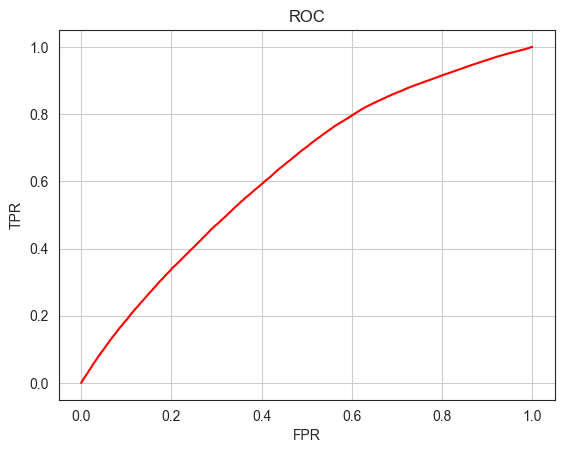

In [10]:
test_probas = pipeline.predict_proba(X_test)[:,1]

fpr, tpr, tresholds = roc_curve(y_test, test_probas)
plt.plot(fpr, tpr, color='red')
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()

print('ROC-AUC-score: ', roc_auc_score(y_test, test_probas))

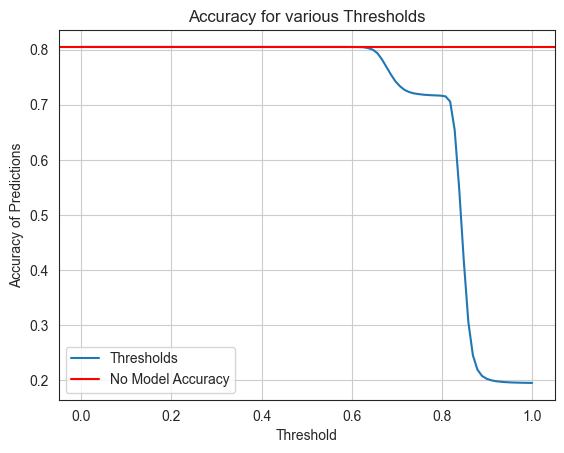

In [11]:
def _compute_accuracy_for_thresholds(data: pd.core.frame.DataFrame):
    """
    Compute Classifier's Accuracy for various thresholds
    """
    
    thresholds = np.linspace(0, 1, 100)
    
    accuracies = []
    
    for threshold in thresholds:
        preds = data['preds'].map(lambda x: 1 if x > threshold else 0)
        accuracy_ = accuracy_score(data['labels'].values, preds)
        accuracies.append(accuracy_)
    
    return accuracies, thresholds
X_test['preds'] = test_probas
X_test['labels'] = y_test
accuracies, thresholds = _compute_accuracy_for_thresholds(X_test)
plt.plot(thresholds.reshape(-1, 1), accuracies, label='Thresholds')
plt.axhline(
    (X_test['labels'].sum()) / len(X_test), color='red', label='No Model Accuracy')
plt.grid()
plt.title('Accuracy for various Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Accuracy of Predictions')
plt.legend()
plt.show()

In [12]:
accuracy_score(X_test['labels'].values, list(map(lambda x: 1 if x > 0.7 else 0, X_test['preds'])))

0.7393148089674771

In [13]:
with open('app/model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)
model = pickle.load(
    open('app/model.pkl', 'rb')
)

# 3.3 Build your own Machine Learning Model

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# set drawing style
sns.set_style('whitegrid')

# Load Dataset
features = ['loan_amnt', 'annual_inc', 'term', 'emp_length'] 
try:
    data = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', usecols=features + ['loan_status'])
except FileNotFoundError:
    data = pd.read_csv('accepted_2007_to_2018Q4.csv', usecols=features + ['loan_status'])

# Data Cleaning
data = data.query("loan_status in ('Fully Paid', 'Charged Off')").copy()
data = data.dropna(subset=['emp_length'])
data['loan_status'] = data['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0})
data['term'] = data['term'].replace({' 36 months': 36, ' 60 months': 60})
data['emp_length'] = data['emp_length'].map(lambda x: x.split(' ')[0])
data['emp_length'] = data['emp_length'].map(lambda x: str(x).replace('+', '').replace('<', '0')).astype(int)

# View data distribution
print(data.head())
print(data.info())
print(data.describe())

C:\Users\86136\AppData\Local\Temp\ipykernel_24628\3841895525.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['loan_status'] = data['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0})
C:\Users\86136\AppData\Local\Temp\ipykernel_24628\3841895525.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['term'] = data['term'].replace({' 36 months': 36, ' 60 months': 60})


   loan_amnt  term  emp_length  annual_inc  loan_status
0     3600.0    36          10     55000.0            1
1    24700.0    36          10     65000.0            1
2    20000.0    60          10     63000.0            1
4    10400.0    60           3    104433.0            1
5    11950.0    36           4     34000.0            1
<class 'pandas.core.frame.DataFrame'>
Index: 1266799 entries, 0 to 2260697
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   loan_amnt    1266799 non-null  float64
 1   term         1266799 non-null  int64  
 2   emp_length   1266799 non-null  int64  
 3   annual_inc   1266799 non-null  float64
 4   loan_status  1266799 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 58.0 MB
None
          loan_amnt          term    emp_length    annual_inc   loan_status
count  1.266799e+06  1.266799e+06  1.266799e+06  1.266799e+06  1.266799e+06
mean   1.460122e+04  4.191581e+01  5.9658

In [15]:
# Defining characteristics and objectives
model_features = ['loan_amnt', 'annual_inc', 'term', 'emp_length']
X = data[model_features]
y = data['loan_status']

# Divide the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking dataset size
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

from sklearn.ensemble import RandomForestClassifier

# Initialisation model and preprocessing pipeline
scaler = MinMaxScaler()
model = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
pipeline = Pipeline([('scaler', scaler), ('model', model)])

Training set size: (886759, 4)
Test set size: (380040, 4)


In [16]:
# training model
pipeline.fit(X_train, y_train)

# predictive probability
test_probas = pipeline.predict_proba(X_test)[:, 1]


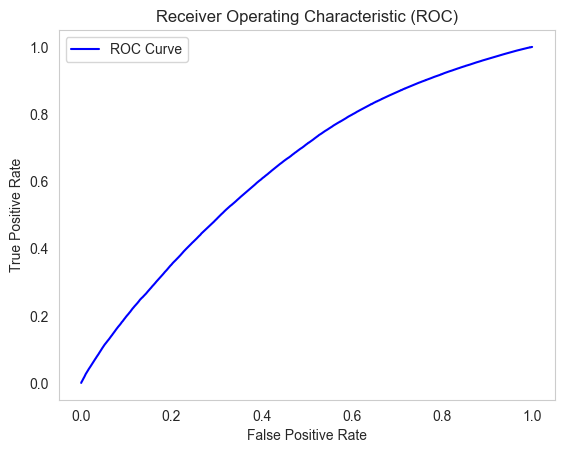

ROC AUC Score: 0.6420


In [17]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, test_probas)
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# AUC score
print(f"ROC AUC Score: {roc_auc_score(y_test, test_probas):.4f}")

In [18]:
# Classified reports
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

import pickle

# save model
with open('pridict_model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

              precision    recall  f1-score   support

           0       0.44      0.00      0.00     74079
           1       0.81      1.00      0.89    305961

    accuracy                           0.81    380040
   macro avg       0.62      0.50      0.45    380040
weighted avg       0.73      0.81      0.72    380040



Model loaded successfully.


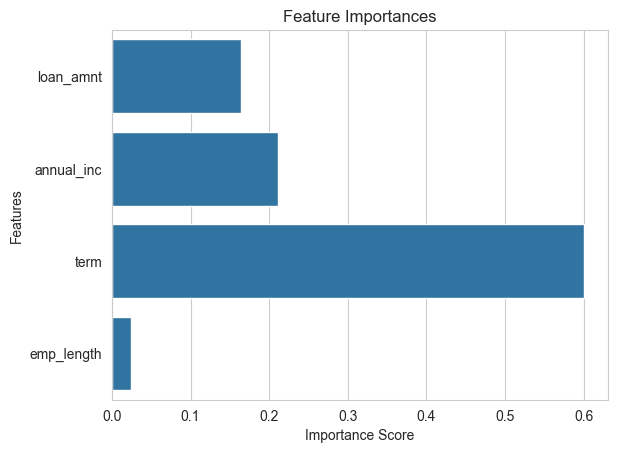

In [19]:
# loading model
loaded_model = pickle.load(open('pridict_model.pkl', 'rb'))
print("Model loaded successfully.")

# Acquisition of feature significance
feature_importances = model.feature_importances_
sns.barplot(x=feature_importances, y=model_features)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()